<a href="https://www.kaggle.com/code/carlosreyes98/my-crime-eda-project?scriptVersionId=147861568" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

U.S CRIME PROJECT: EXPLORATORY DATA ANALYSIS

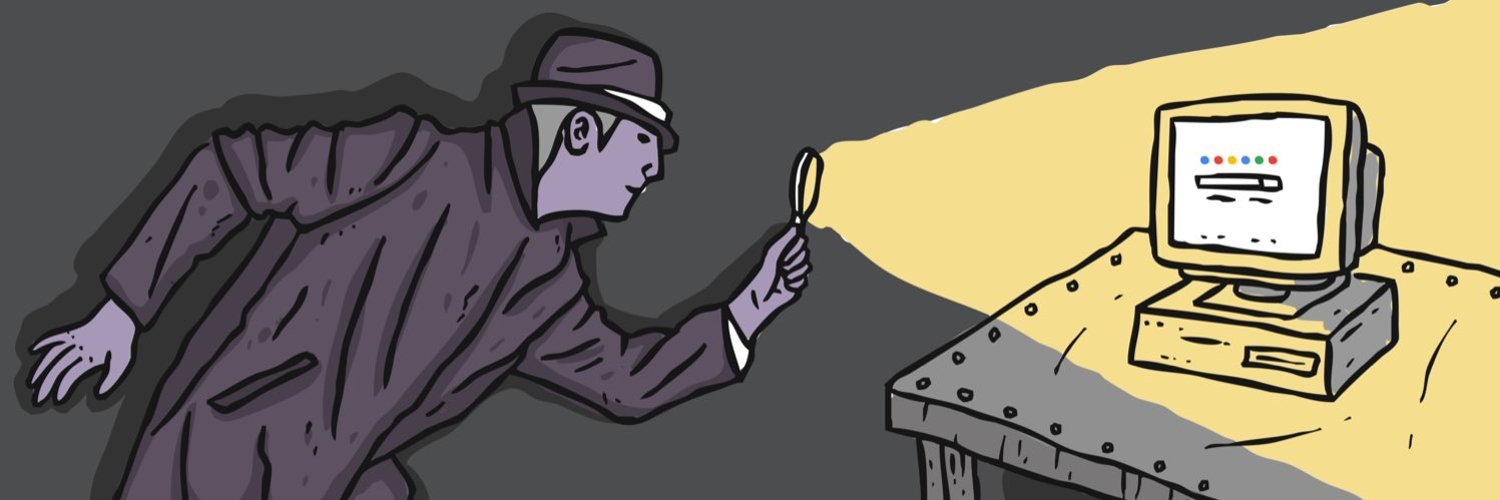

IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

GENERAL INFO:

In [2]:
# source: https://cde.ucr.cjis.gov
df = pd.read_excel("/kaggle/input/crime-data/TSP-State-Data-2023-1-25.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         51 non-null     object 
 1   Code                          51 non-null     object 
 2   Total Incarcerated            51 non-null     int64  
 3   Prison Population             51 non-null     int64  
 4   Jail Population               51 non-null     int64  
 5   Imprisonment Rate             50 non-null     float64
 6   Jail Incarceration Rate (a)   45 non-null     float64
 7   Probation Population          51 non-null     int64  
 8   Parole Population             51 non-null     int64  
 9   Life Sentences                50 non-null     float64
 10  Life Without Parole           49 non-null     float64
 11  Juvenile Life Without Parole  50 non-null     float64
 12  Private Prison Population     46 non-null     float64
 13  Male   

PRISION POPULATION:

In [3]:
# source: https://cde.ucr.cjis.gov
prision_pop = df["Total Incarcerated"].astype(int).sum()
usa_pop = 331900000
prision_pop_percent = prision_pop / usa_pop * 100
print(f"Prision population: {prision_pop} --> ({round(prision_pop_percent,2)}% of the USA population)")

Prision population: 1775291 --> (0.53% of the USA population)


POPULATION BY STATE:

In [4]:
# source: https://cde.ucr.cjis.gov
fig = px.choropleth(df, locations="Code", locationmode="USA-states", color="Total Incarcerated", scope="usa",
                    color_continuous_scale=px.colors.sequential.Magenta, template="plotly_white")

fig.update_layout(title="Total Incarcerated by State",legend_title="")

fig.show()

POPULATION BY SEX:

In [5]:
# source: https://cde.ucr.cjis.gov
sex_pop = pd.DataFrame({"Sex": ["Female", "Male"], "Amount": np.array([df["Female"].sum(), df["Male"].sum()]).astype(int)})

px.pie(sex_pop,values="Amount",names="Sex",template="plotly_white",
       title= "Female vs Male Prision Population",opacity=1,
       color_discrete_sequence=px.colors.sequential.Magenta) 

AGE RANGE OF PRISIONERS:

In [6]:
# source: https://cde.ucr.cjis.gov
age_prisioners = pd.read_excel("/kaggle/input/crime-data/Age Prisioners.xlsx")

fig = px.bar(age_prisioners, x="Age", y="Amount", color="Amount", title="Age of Prisioners", template="plotly_white",opacity=0.8)
fig.update_layout(xaxis_title="Age Groups", yaxis_title="")

ARRESTED BY:

In [7]:
# source: https://cde.ucr.cjis.gov
arrested = pd.read_csv("/kaggle/input/crime-data/Arrest by Offense_10-13-2023.csv")
arrested.sort_values(by="value",ascending=False, inplace=True)

px.pie(arrested.head(10), values="value", names="key", title="Arrest by Offense: Top 10",
       template="plotly_white",color_discrete_sequence=px.colors.sequential.Sunset,
       opacity=0.9, hole=0.5)

BIAS:


In [8]:
# source: https://cde.ucr.cjis.gov
bias = pd.read_csv("/kaggle/input/crime-data/Bias Types_10-13-2023.csv")
bias.sort_values(by="value",ascending=True, inplace=True)

fig = px.bar(bias.head(10), y="key", x="value", title="Arrested by Bias Types: Top 10",template="plotly_white",opacity= 0.9, color_discrete_sequence=px.colors.sequential.Sunset)
fig.update_layout(xaxis_title="Amount of Cases", yaxis_title="")

FATHERLESS HOMES IMPACT IN CRIME:

The importance of the father figure in society is very clear, every year we see more homes without a father's presence, which has a very great impact on crime and the development of society.

Key Statistics:

-24.7 million children (33%) in the United States live in fatherless homes.

-Children living in fatherless homes have increased by 25% since 1960.

-45.6% of Black children lived with their mother only in 2021.

-85% of children with absent fathers get involved in crime.

-70% of children in fatherless homes have dropped out of high school. 

-Children living in fatherless homes are 4 times more apt to live in poverty.

-Girls raised in fatherless homes are 8 times more apt to become a teenage mother.

-85% of all children living without a father experience behavioral disorder.

-Teenagers with positive and nurturing fathers are 80% less apt to go to prison.

HISTORICAL DATA CRIME IN USA:

In [9]:
# source: https://cde.ucr.cjis.gov
df = pd.read_excel("/kaggle/input/crime-data/Historical Stats.xlsx")

fig = px.line(df, x='Years', y=["Property Crimes", "Violent Crimes"], title='Historical Crime Stats',
              template='plotly_white', color_discrete_sequence=px.colors.sequential.Hot)

fig.update_layout(xaxis_title='Years', yaxis_title='Number of Crimes',legend_title=' Legend:')

fig.show()

print(''' In a property crime, a victim's property is stolen or destroyed, without the use or threat of force
 against the victim. Property crimes include burglary and theft as well as vandalism and arson.''')


 In a property crime, a victim's property is stolen or destroyed, without the use or threat of force
 against the victim. Property crimes include burglary and theft as well as vandalism and arson.


LOCATIONS OF CRIME:

In [10]:
location = pd.read_csv("/kaggle/input/crime-data/Location Type_10-13-2023.csv")
location.sort_values(by="value",ascending=False, inplace=True)

fig = px.funnel(location.head(10), x='value', y='key', title='Location of Crimes - Last Year', template='plotly_white')
fig.update_layout(xaxis_title='', yaxis_title='')

fig.show()

BURGALRY KEY STATISTICS:

-There are 2.5 million burglaries annually in the United States. 66% of these are home invasions. (US Department of Justice)

-Every 15 seconds a home burglary occurs in the United States. (Crimepreventiontips.com)

-A break-in occurs every 26 seconds in the US. (FBI)

-Homes without a security system are 300% more likely to be broken into and burglarized. (Alarms.org)

-46.9% of people don’t have a home security system installed in their home. (The Zebra)

-83% of would-be burglars check for the presence of an alarm system before attempting a break-in. (FBI)

-34% of burglars use the front door when breaking into a home. (Bureau of Justice)

-Police solve only 13% of reported burglary cases. (Pew Research Center)

PROPERTY STOLEN AND RECOVERED:

In [11]:
# source: https://cde.ucr.cjis.gov
df = pd.read_excel("/kaggle/input/crime-data/Property.xlsx")
df.sort_values(by='Stolen',inplace=True)

fig = px.bar(df, y='key', x=["Recovered", "Stolen"], title='Stolen vs Recovered',template='plotly_white',
             opacity=0.8, color_discrete_sequence=px.colors.sequential.Hot)

fig.update_layout(xaxis_title='Amount', yaxis_title='',legend_title='Property')
fig.show()

DEATHS BY:

In [12]:
# source: https://usafacts.org/data/topics/security-safety/crime-and-justice/firearms/firearm-deaths/
arm = pd.read_excel("/kaggle/input/crime-data/firearm_deaths_usafacts.xlsx").transpose()

arm.columns = arm.iloc[0]
arm.drop(arm.index[0], inplace=True)

fig = px.line(arm, x = range(1981,2022), y = ["Firearm deaths", "Homicide", "Suicide"], title="Deaths",template="plotly_white", color_discrete_sequence=px.colors.sequential.Hot)
fig.update_layout(xaxis_title="Time Line", yaxis_title="Cases",legend_title = "       By")

ARE GUNS THE PROBLEM?

In [13]:
# source: https://www.theglobaleconomy.com/ 
homicides = pd.read_excel("/kaggle/input/crime-data/Homicidies Rate.xlsx")
gun_ownership = pd.read_excel("/kaggle/input/crime-data/gun-ownership-by-country-2023.xlsx")


fig1 = px.choropleth(homicides, locations="Countries", locationmode='country names', color="Homicides Rate x 100.000",
                    hover_name="Homicides Rate x 100.000", color_continuous_scale=px.colors.sequential.Sunset,
                    template="plotly_white")

fig2 = px.choropleth(gun_ownership, locations="Country", locationmode='country names', color="Ownership Rate x 100000",
                    hover_name="Ownership Rate x 100000", color_continuous_scale=px.colors.sequential.Sunset,
                    template="plotly_white")

fig1.update_layout(
    title_text='Homicides Rate - World',
    legend_title="Rate per 100K",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='robinson'))

fig2.update_layout(
    title_text='Firearms Ownership Rate - World',
    legend_title="Rate per 100K",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='robinson'))

fig1.show()
fig2.show()

The free carrying of weapons, which is defended by the Second Amendment of the Constitution of the United States of America for the legitimate defense of the individual, is not a causal factor for higher homicide rates. Other factors such as poverty have a direct impact in a society with high homicide rates, weapons are not the problem, countries in Latin America with high homicide rates, the majority of citizens do not have the ability to carry weapons for legitimate defense, but criminals or drug cartels do.

Key factors that influence homicide rates:

-Population density and degree of urbanization.

-Variations in composition of the population, particularly youth concentration.

-Economic conditions, poverty level, and job availability.

-Family conditions with respect to divorce and family cohesiveness.

-Effective strength of law enforcement agencies.

-Administrative and investigative emphases of law enforcement.

CONCLUSION:

That's is!. To reduce crime in our society, it is essential that we strengthen the family as an institution and reinforce the living conditions of individuals. Weapons are not a problem, they are often the solution for innocent people who cannot be denied the right to self-defense. Building a strong society from the ground up, is essential to achieving low crime rates.

Thank you, peace!